In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f1_df = pd.DataFrame({
    "team": [
        # Original 16 teams
        "bender",
        "carrerasa",
        "carrerasb",
        "chieu",
        "curran",
        "demeulder",
        "florian",
        "hammerton",
        "hendrickx",
        "klein",
        "mayfield",
        "mccallum",
        "munro",
        "whitelaw",
        "wu",
        "zhang",
        # New models
        "Akbik2018",
        "Akbik2019",
    ],
    "f1_before": [
        # Original 16 teams
        0.839228,
        0.849965,
        0.842987,
        0.883138,
        0.848906,
        0.769687,
        0.887646,
        0.601480,
        0.782038,
        0.863074,
        0.846724,
        0.840353,
        0.825050,
        0.797828,
        0.817027,
        0.855003,
        # New models
        0.9165,
        0.9322,
    ],
    "f1_after": [
        # Original 16 teams
        0.834602,
        0.842392,
        0.834341,
        0.876062,
        0.844397,
        0.759297,
        0.882243,
        0.589273,
        0.775132,
        0.862130,
        0.839869,
        0.835490,
        0.817620,
        0.788093,
        0.810647,
        0.852186,
        # New models
        0.9153,
        0.9272
    ]  
})
f1_df

,team,f1_before,f1_after
0,bender,0.839228,0.834602
1,carrerasa,0.849965,0.842392
2,carrerasb,0.842987,0.834341
3,chieu,0.883138,0.876062
4,curran,0.848906,0.844397
5,demeulder,0.769687,0.759297
6,florian,0.887646,0.882243
7,hammerton,0.601480,0.589273
8,hendrickx,0.782038,0.775132
9,klein,0.863074,0.862130


In [3]:
sorted_f1_df = f1_df.sort_values(["f1_before"])
sorted_f1_df

,team,f1_before,f1_after
7,hammerton,0.601480,0.589273
5,demeulder,0.769687,0.759297
8,hendrickx,0.782038,0.775132
13,whitelaw,0.797828,0.788093
14,wu,0.817027,0.810647
12,munro,0.825050,0.817620
0,bender,0.839228,0.834602
11,mccallum,0.840353,0.835490
2,carrerasb,0.842987,0.834341
10,mayfield,0.846724,0.839869


In [4]:
# Make image dir if doesn't exist
data_dir = os.path.join("..", "corrected_labels", "human_labels_audited")
image_dir = os.path.join(data_dir, "label_stats_images")
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


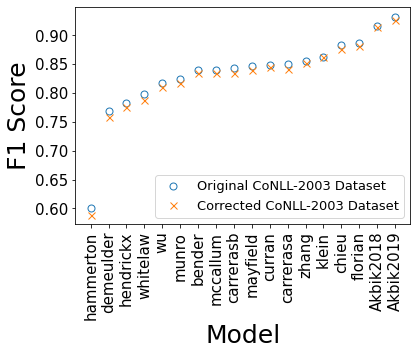

In [5]:
# Generate synthetic X values, then replace them with team names
x_values = list(range(len(sorted_f1_df.index)))
plt.xticks(x_values, sorted_f1_df["team"], rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.plot(x_values, sorted_f1_df["f1_before"], "o", label="Original CoNLL-2003 Dataset", markersize=7, markerfacecolor='none')
plt.plot(x_values, sorted_f1_df["f1_after"], "x", label="Corrected CoNLL-2003 Dataset", markersize=7, markerfacecolor='none')
plt.ylabel("F1 Score", fontsize=25)
plt.xlabel("Model", fontsize=25)
plt.legend(fontsize=13)

# Also save to a local file
plt.savefig(os.path.join(image_dir, "f1_change.png"), bbox_inches="tight")
plt.savefig(os.path.join(image_dir, "f1_change.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(image_dir, "f1_change.eps"), bbox_inches="tight")

plt.show()

In [6]:
conll_f1_df = sorted_f1_df.iloc[:-2]
conll_f1_df

,team,f1_before,f1_after
7,hammerton,0.601480,0.589273
5,demeulder,0.769687,0.759297
8,hendrickx,0.782038,0.775132
13,whitelaw,0.797828,0.788093
14,wu,0.817027,0.810647
12,munro,0.825050,0.817620
0,bender,0.839228,0.834602
11,mccallum,0.840353,0.835490
2,carrerasb,0.842987,0.834341
10,mayfield,0.846724,0.839869


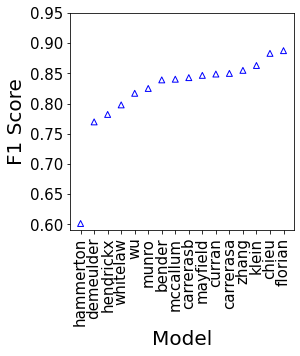

In [7]:
x_values = list(range(len(conll_f1_df.index)))

plt.figure(figsize=(4,4))
plt.xticks(x_values, conll_f1_df["team"], rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(x_values, conll_f1_df["f1_before"], s=35, facecolors='none', edgecolors='b', marker='^')
plt.ylabel("F1 Score", fontsize=20)
plt.xlabel("Model", fontsize=20)
plt.ylim([0.59, 0.95])

# Also save to a local file
plt.savefig(os.path.join(image_dir, "team_vs_f1_score.png"), bbox_inches="tight")
plt.savefig(os.path.join(image_dir, "team_vs_f1_score.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(image_dir, "team_vs_f1_score.eps"), bbox_inches="tight")

plt.show()

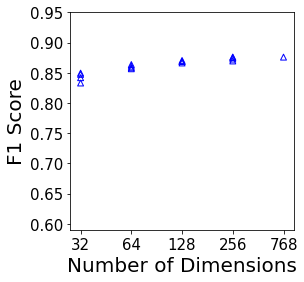

In [11]:
dims_vs_f1_score = pd.read_csv(os.path.join(data_dir, "dims_vs_f1_score.csv"))

plt.figure(figsize=(4,4))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.scatter(dims_vs_f1_score["num_dims"].astype(str), 
            dims_vs_f1_score["f1_score"], s=35, marker='^', facecolors='none', edgecolors='b')
#plt.yscale("log")
#plt.xscale("log")
plt.xlabel("Number of Dimensions", fontsize=20)
plt.ylabel("F1 Score", fontsize=20)
plt.ylim([0.59, 0.95])

# Also save to a local file
plt.savefig(os.path.join(image_dir, "dims_vs_f1_score.png"), bbox_inches="tight")
plt.savefig(os.path.join(image_dir, "dims_vs_f1_score.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(image_dir, "dims_vs_f1_score.eps"), bbox_inches="tight")

plt.show()

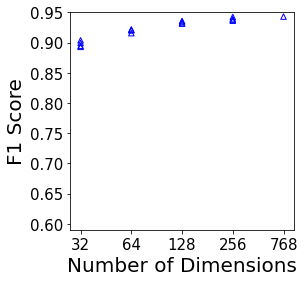

In [12]:
dims_vs_f1_score_xval = pd.read_csv(os.path.join(data_dir, "dims_vs_f1_score_xval.csv"))

plt.figure(figsize=(4,4))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.scatter(dims_vs_f1_score_xval["num_dims"].astype(str), 
            dims_vs_f1_score_xval["f1_score"], s=30,marker='^', facecolors='none', edgecolors='b')
#plt.yscale("log")
#plt.xscale("log")
plt.ylim([0.59, 0.95])
plt.xlabel("Number of Dimensions", fontsize=20)
plt.ylabel("F1 Score", fontsize=20)

# Also save to a local file
plt.savefig(os.path.join(image_dir, "dims_vs_f1_score_xval.png"), bbox_inches="tight")
plt.savefig(os.path.join(image_dir, "dims_vs_f1_score_xval.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(image_dir, "dims_vs_f1_score_xval.eps"), bbox_inches="tight")

plt.show()